# Multivariate linear regresion


In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 116 µs (started: 2024-08-28 23:42:49 +07:00)


## 1.1 Normal equation (Numpy version)

theta =  [ 7. 15. -6.]
y predict =  [13.]
data =  [(0, 1), (2, 1), (3, 4)]


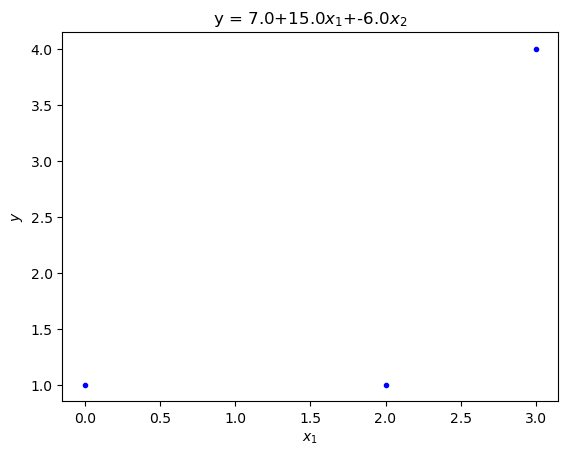

time: 3.74 s (started: 2024-08-28 23:42:54 +07:00)


In [2]:
import numpy as np
np.set_printoptions(precision=2)
from sklearn.datasets import make_regression

#x, y = make_regression(n_samples=10, n_features=2, noise=2, random_state=123)
#x = np.array([[0,2,3],[1,6,8]]).T
x = np.array([[0,1],[2,6],[3,8]]) #x1, x2
y = np.array([1,1,4])

x_b = np.c_[np.ones((x.shape[0],1)),x]

#call inverse function from linear algebra module
theta = np.linalg.pinv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print("theta = ", theta)

#predict trainned x
xtest = np.array([[4,9]])
xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
y_p = xtest_b.dot(theta)
print("y predict = ",y_p)

import matplotlib.pyplot as plt

#Create the title
exp = ""
plus = "+"
for t in range(len(theta)):
  if t == len(theta)-1:
    plus = ""
  if t == 0:
    xterm = ""
  else:
    xterm = r"$x_"+str(t)+"$"
  exp += str(np.round(theta[t],2)) + xterm + plus
#end create the title

plt.title("y = "+exp)
data = sorted(zip(x[:,0],y))
print("data = ", data)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

plt.plot(x_val, y_val, "b.")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$y$')

plt.show()


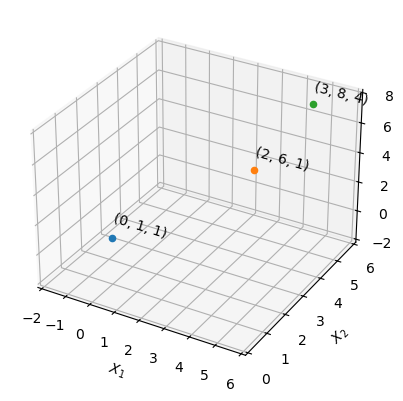

time: 100 ms (started: 2024-08-28 23:43:05 +07:00)


In [3]:
ax = plt.figure().add_subplot(projection='3d')

xs = x[:,0]
ys = x[:,1]
zs = y

for x1, x2, _y in zip(xs, ys, zs):
  label = '(%d, %d, %d)' % (x1, x2, _y)
  ax.text(x1, x2, _y, label, 'x')
  ax.scatter(x1, x2, zs=_y)

ax.set_xlim(-2, 6)
ax.set_ylim(0, 6)
ax.set_zlim(-2, 8)
ax.set_xlabel(r'$X_1$')
ax.set_ylabel(r'$X_2$')
ax.set_zlabel('Y')

plt.show()

Exercise1 <br>
1.1 Change a number of features to 4 (x1,x2,x3,x4) and plot 4 graphs </br>
1.2 Change a number of features to 2 (x1,x2) and use plotly to plot 3D visualization (x1,x2,y).

# **Sklearn**

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, " , ", lin_reg.coef_)

#prediction
y_p = lin_reg.predict(xtest)
print("y predict = ",y_p)

6.999999999999984  ,  [15. -6.]
y predict =  [13.]
time: 230 ms (started: 2024-08-28 23:43:10 +07:00)


# **Batch Gradient descent (Multiple linear regression)**


In [48]:
def cost_function(theta, x, y, N):
  y_hat = x.dot(theta)
  c = (1/(2*N))*np.sum((y_hat-y)**2)
  return c

time: 535 µs (started: 2024-08-29 01:03:32 +07:00)


In [49]:
x


array([[0, 1],
       [2, 6],
       [3, 8]])

time: 6.21 ms (started: 2024-08-29 01:03:34 +07:00)


In [50]:
x_b

array([[1., 0., 1.],
       [1., 2., 6.],
       [1., 3., 8.]])

time: 2.27 ms (started: 2024-08-29 01:03:35 +07:00)


In [51]:
def gradient_descent(alpha, x, y, ep=0.001, max_iter=10000):
  converged = False
  iter = 0
  N = x.shape[0] # number of samples
  print("Num of data = ",N)

  # initial theta
  theta =  np.random.random((x.shape[1],1))
  print("Init theta.shape = ",theta.shape)

  # total error, J(theta)
  J = cost_function(theta, x, y, N)
  print("First J = ",J)

  # Iterate Loop
  while not converged:

    y_hat = x.dot(theta)
    diff = y_hat - y
    grad = x.T.dot(diff)

    theta = theta - alpha * (1/N) * (grad)

    assert theta.shape == (3,1) #This line makes sure that the shape of theta is still be the same.

    # error
    J2 = cost_function(theta, x, y, N)

    if abs(J-J2) <= ep:
        print("       Converged, iterations: ", iter, "/", max_iter)
        converged = True

    J = J2   # update error s
    iter += 1  # update iter

    if iter == max_iter:
        print('       Max iterations exceeded!')
        converged = True

  #print("End converged iter = ",iter)
  return theta

time: 1.57 ms (started: 2024-08-29 01:03:36 +07:00)


In [52]:
if __name__ == '__main__':

  print("start main")
  print(x_b.shape)
  y = y.reshape(-1,1)
  print(y.shape)

  alpha = 0.01 # learning rate
  #Training process
  theta = gradient_descent(alpha, x_b, y, ep=0.000000000001, max_iter=1000000)
  print ("Theta = ", theta)

  #predict trainned x
  xtest = np.array([[4,9]])
  xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
  y_p = xtest_b.dot(theta)
  print("y predict = ",y_p)



start main
(3, 3)
(3, 1)
Num of data =  3
Init theta.shape =  (3, 1)
First J =  1.0184240845674914
       Converged, iterations:  277450 / 1000000
Theta =  [[ 7.]
 [15.]
 [-6.]]
y predict =  [[13.]]
time: 1.44 s (started: 2024-08-29 01:03:38 +07:00)


In [53]:
np.random.random((x_b.shape[1], ))

array([0.56, 0.47, 0.05])

time: 2 ms (started: 2024-08-29 01:03:42 +07:00)


# Stochastic GD
## Your turn :)

In [57]:
def stochastic_gradient_descent(alpha, x, y, ep=0.001, max_iter=10000000):

    N = x.shape[0]  # Number of samples
    print("Number of data = ", N)

    # Initial theta
    theta = np.random.random((x.shape[1], ))

    # Track cost function values
    costs = []
    J = cost_function(theta, x, y, N)
    costs.append(J)

    for iter in range(max_iter):
        # Shuffle data
        x_y = np.hstack((x, y.reshape(-1, 1)))
        np.random.shuffle(x_y)
        x_shuffled = x_y[:, :-1]
        y_shuffled = x_y[:, -1].reshape(-1, 1)

        for i in range(N):
            y_hat = x_shuffled[i].dot(theta)
            diff = y_hat - y_shuffled[i]
            grad = x_shuffled[i] * diff

            # Update theta
            theta -= alpha * grad

            # Compute and record cost
            J2 = cost_function(theta, x, y, N)
            costs.append(J2)

            # Learning rate decay
            alpha /= (1 + 0.0000000001 * iter)

            # Check convergence based on cost function change
            if abs(J - J2) < ep:

                # Plotting the cost function
                plt.plot(costs[-10000:])
                plt.xlabel('Iterations')
                plt.ylabel('Cost')
                plt.title('Cost Function Progress')
                plt.show()
                print(f"Converged based on cost change, iterations: {iter}/{max_iter}")
                return theta
                break

            J = J2

    print('Max iterations exceeded!')

time: 2.8 ms (started: 2024-08-29 01:04:22 +07:00)


Number of data =  3


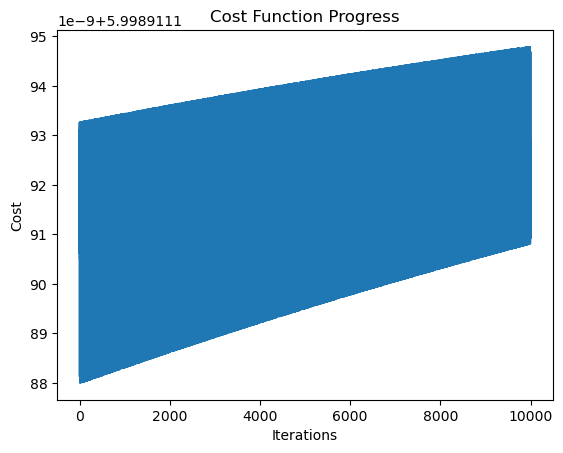

Converged based on cost change, iterations: 283022/1000000
theta: [ 7.   14.99 -6.  ]
time: 5.5 s (started: 2024-08-29 01:04:22 +07:00)


In [58]:
theta = stochastic_gradient_descent(alpha=0.01, x=x_b, y=y, ep=0.0000000001, max_iter=1000000)
print(f"theta: {theta}")


# Mini-batch GD (size = 10)
## Your turn :)

Final theta: [ 7. 15. -6.]
Predicted y: [13.]


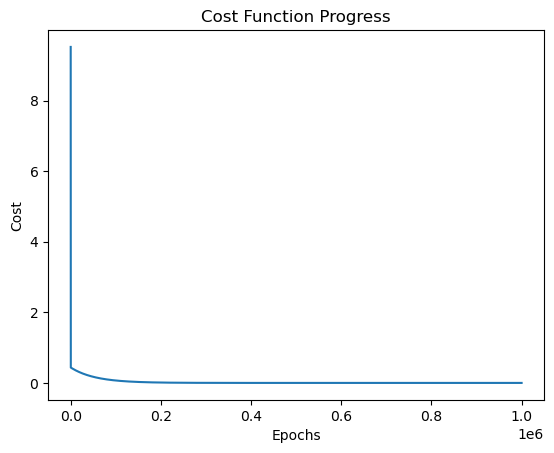

time: 6.94 s (started: 2024-08-29 00:57:42 +07:00)


In [40]:
# Mini-batch Gradient Descent
def mini_batch_gradient_descent(x, y, theta, alpha=0.01, epochs=100000, batch_size=10):
    m = len(y)
    
    # Initialize 
    theta = np.random.random((x.shape[0], ))
    
    cost_history = []
    cost = cost_function(theta, x, y)
    cost_history.append(cost)

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        
        for i in range(0, m, batch_size):
            x_batch = x_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            y_hat = np.dot(x_batch, theta)
            gradients = (1/batch_size) * x_batch.T.dot(y_hat - y_batch)
            theta = theta - alpha * gradients

        cost2 = cost_function(theta, x, y)
        cost_history.append(cost2)

    return theta, cost_history


# Define learning rate and number of epochs
alpha = 0.01  # learning rate
epochs = 1000000  # Number of epochs
batch_size = 10  

# Training using mini-batch gradient descent
theta_final, cost_history = mini_batch_gradient_descent(x_b, y, theta, alpha, epochs, batch_size)

print("Final theta:", theta_final)

# Predict with trained theta
xtest = np.array([[4, 9]])
xtest_b = np.c_[np.ones((xtest.shape[0], 1)), xtest]
y_p = xtest_b.dot(theta_final)
print("Predicted y:", y_p)

# Plotting the cost function
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Progress')
plt.show()



# Polynomial regression
Reference: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week03-MLR/Position_Salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values
print(df.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
time: 61.9 ms (started: 2024-08-22 02:11:14 +00:00)


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


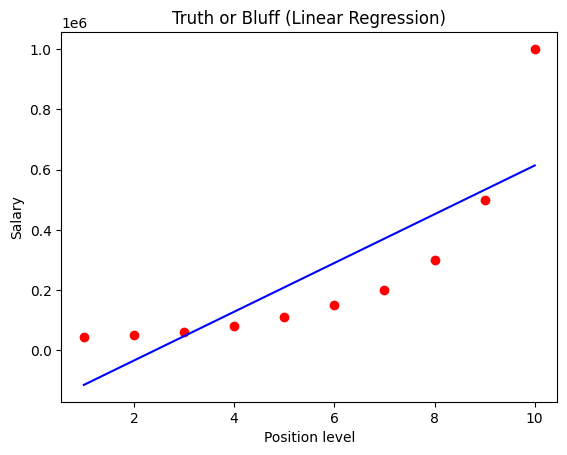

time: 489 ms (started: 2024-08-22 02:11:14 +00:00)


In [ ]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(y)
# Visualizing the Linear Regression results

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


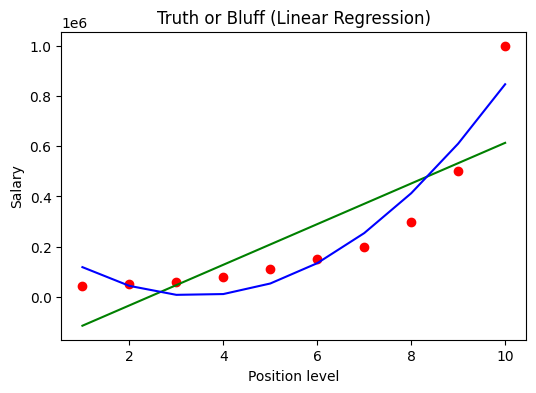

time: 868 ms (started: 2024-08-22 02:11:15 +00:00)


In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
print(X_poly)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='green')
plt.plot(X, pol_reg.predict(X_poly), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [ ]:
# Predicting a new result with Linear Regression
print(lin_reg.predict([[5.5]]))

# Predicting a new result with Polymonial Regression
print(pol_reg.predict(poly_reg.fit_transform([[5.5]])))

[249500.]
[89187.5]
time: 2.59 ms (started: 2024-08-22 02:11:16 +00:00)


In [ ]:
import numpy as np
np.set_printoptions(precision=2)
from sklearn.datasets import make_regression

#x, y = make_regression(n_samples=10, n_features=2, noise=2, random_state=123)
#x = np.array([[0,2,3],[1,6,8]]).T
x = np.array([[0,1],[2,6],[3,8]]) #x1, x2
y = np.array([1,1,4])

x_b = np.c_[np.ones((x.shape[0],1)),x]

#call inverse function from linear algebra module
theta = np.linalg.pinv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print("theta = ", theta)

#predict trainned x
xtest = np.array([[4,9]])
xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
y_p = xtest_b.dot(theta)
print("y predict = ",y_p)

import matplotlib.pyplot as plt

#Create the title
exp = ""
plus = "+"
for t in range(len(theta)):
  if t == len(theta)-1:
    plus = ""
  if t == 0:
    xterm = ""
  else:
    xterm = r"$x_"+str(t)+"$"
  exp += str(np.round(theta[t],2)) + xterm + plus
#end create the title

plt.title("y = "+exp)
data = sorted(zip(x[:,0],y))
print("data = ", data)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

plt.plot(x_val, y_val, "b.")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$y$')

plt.show()

def cost_function(theta, x, y, N):
  y_hat = x.dot(theta)
  c = (1/(2*N))*np.sum((y_hat-y)**2)
  return c

def stochastic_gradient_descent(alpha, x, y, ep=0.001, max_iter=10000000):

    N = x.shape[0]  # Number of samples
    print("Number of data = ", N)

    # Initial theta
    theta = np.random.random((x.shape[1], ))

    # Track cost function values
    costs = []
    J = cost_function(theta, x, y, N)
    costs.append(J)

    for iter in range(max_iter):
        # Shuffle data
        x_y = np.hstack((x, y.reshape(-1, 1)))
        np.random.shuffle(x_y)
        x_shuffled = x_y[:, :-1]
        y_shuffled = x_y[:, -1].reshape(-1, 1)

        for i in range(N):
            y_hat = x_shuffled[i].dot(theta)
            diff = y_hat - y_shuffled[i]
            grad = x_shuffled[i] * diff

            # Update theta
            theta -= alpha * grad

            # Compute and record cost
            J2 = cost_function(theta, x, y, N)
            costs.append(J2)

            # Learning rate decay
            alpha /= (1 + 0.0000000001 * iter)

            # Check convergence based on cost function change
            if abs(J - J2) < ep:

                # Plotting the cost function
                plt.plot(costs[-10000:])
                plt.xlabel('Iterations')
                plt.ylabel('Cost')
                plt.title('Cost Function Progress')
                plt.show()
                print(f"Converged based on cost change, iterations: {iter}/{max_iter}")
                return theta
                break

            J = J2

    print('Max iterations exceeded!')

if __name__ == '__main__':

  print("start main")
  print(x_b.shape)
  y = y.reshape(-1,1)
  print(y.shape)

  alpha = 0.01 # learning rate
  #Training process
  theta = gradient_descent(alpha, x_b, y, ep=0.000000000001, max_iter=1000000)
  print ("Theta = ", theta)

  #predict trainned x
  xtest = np.array([[4,9]])
  xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
  y_p = xtest_b.dot(theta)
  print("y predict = ",y_p)


